In [46]:
import pickle as pic
import cPickle
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd
import re

In [6]:
def save_obj(obj, name):
    with open(name, 'wb') as f:
        pic.dump(obj, f, pic.HIGHEST_PROTOCOL)
def load_obj(name ):
    with open(name, 'rb') as f:
        return pic.load(f)

In [160]:
sgd = load_obj('models/sgd_text_model.pickle')
print sgd
report = classification_report(sgd['y_test'], sgd['model'].predict(sgd['X_test']), target_names = sgd['labels_names'])
print report

{'X_test': <9417x31396 sparse matrix of type '<type 'numpy.float64'>'
	with 504926 stored elements in Compressed Sparse Row format>, 'X_train': <28251x31396 sparse matrix of type '<type 'numpy.float64'>'
	with 1514927 stored elements in Compressed Sparse Row format>, 'labels_names': array([u'Action', u'Adventure', u'Animation', u'Comedy', u'Crime',
       u'Documentary', u'Drama', u'Family', u'Fantasy', u'Horror',
       u'Mystery', u'Romance', u'Sci-Fi', u'Short', u'Thriller'], dtype=object), 'y_train': array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 'model': GridSearchCV(cv=None, error_score='raise',
       estimator=OneVsRestClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n

In [161]:
genres = list(sgd['labels_names'])
genres.append('avg')

In [162]:
def get_values(uni, genres):
    ret_dic = {}
    for dex, gen in enumerate(genres):
        loc = uni.find(gen)
        if dex < len(genres)-1:
            next_loc = uni.find(genres[dex+1])
            nums = re.findall(r'\d+', uni[loc+len(gen):next_loc])
            ap_dic = {'precision':float(nums[1])*.01, 'recall':float(nums[3])*.01, 'f1-score':float(nums[5])*.01, 'support':float(nums[6])}
            ret_dic[gen] = ap_dic 
    return ret_dic

In [163]:
def to_df(dic):
    ret_df = pd.DataFrame(columns = ['title','precision', 'recall', 'f1-score', 'support'])
    for k, v in dic.items():
        ret_df = ret_df.append({'title':k, 'precision':v['precision'], 'recall':v['recall'], 'f1-score':v['f1-score'], 'support':v['support']}, ignore_index=True)
    return ret_df

In [164]:
print get_values(report, genres)

{u'Mystery': {'recall': 0.04, 'f1-score': 0.08, 'support': 511.0, 'precision': 0.71}, u'Romance': {'recall': 0.18, 'f1-score': 0.29, 'support': 1357.0, 'precision': 0.66}, u'Short': {'recall': 0.25, 'f1-score': 0.39, 'support': 960.0, 'precision': 0.91}, u'Sci-Fi': {'recall': 0.34, 'f1-score': 0.48, 'support': 517.0, 'precision': 0.8200000000000001}, u'Family': {'recall': 0.22, 'f1-score': 0.35000000000000003, 'support': 643.0, 'precision': 0.8300000000000001}, u'Horror': {'recall': 0.48, 'f1-score': 0.61, 'support': 946.0, 'precision': 0.85}, u'Crime': {'recall': 0.23, 'f1-score': 0.35000000000000003, 'support': 948.0, 'precision': 0.7000000000000001}, u'Drama': {'recall': 0.6900000000000001, 'f1-score': 0.71, 'support': 4149.0, 'precision': 0.72}, u'Fantasy': {'recall': 0.1, 'f1-score': 0.18, 'support': 481.0, 'precision': 0.88}, u'Animation': {'recall': 0.3, 'f1-score': 0.45, 'support': 598.0, 'precision': 0.9}, u'Adventure': {'recall': 0.09, 'f1-score': 0.17, 'support': 712.0, 'pre

In [166]:
sgd_df = to_df(get_values(report, genres))

In [167]:
forest = load_obj('models/forest_text_model.pickle')
print forest
report = classification_report(forest['y_test'], forest['model'].predict(forest['X_test']), target_names = forest['labels_names'])
print report

{'X_test': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32), 'X_train': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32), 'labels_names': ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'], 'y_train': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 

In [168]:
forest_df = to_df(get_values(report, genres))

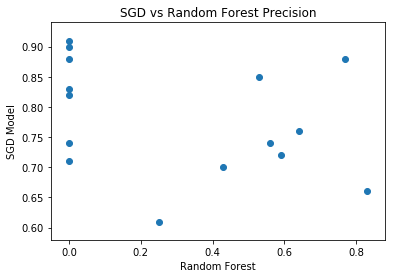

In [176]:
plt.scatter(forest_df['precision'], sgd_df['precision'])
plt.ylabel('SGD Model')
plt.xlabel('Random Forest')
plt.title('SGD vs Random Forest Precision')
plt.show()

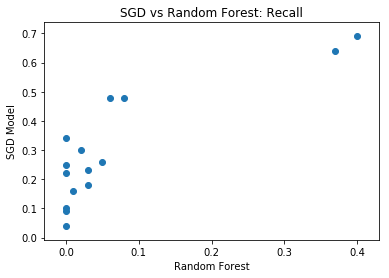

In [177]:
plt.scatter(forest_df['recall'], sgd_df['recall'])
plt.ylabel('SGD Model')
plt.xlabel('Random Forest')
plt.title('SGD vs Random Forest: Recall')
plt.show()

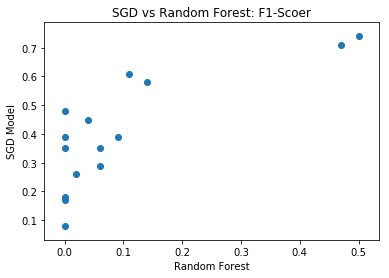

In [178]:
plt.scatter(forest_df['f1-score'], sgd_df['f1-score'])
plt.ylabel('SGD Model')
plt.xlabel('Random Forest')
plt.title('SGD vs Random Forest: F1-Score')
plt.show()